# Setting up the environment

## Load all the important packages

<font color=gray size=3>Nhập các package cần thiết cho việc phân tích và trình bày dữ liệu</font>

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## <font color=red>1. Set up the functions to handles data </font>

### 1.1 Load raw data and clean it

This function will load the data from the Excel file, strips useless columns and make sure the data is concisely compact

In [43]:
#Read Excel file and select only useful columns:
def read_data(filedir, list_of_useful_columns, year):
    file_data = pd.read_excel(filedir) #filedir is the name of the file within the same folder as this notebook
    file_data = file_data.filter(items=pd.read_excel('Useful Columns.xlsx', index_col=0).index.tolist()) #list_of_useful_columns is the list of useful columns that is exported from the Excel file Useful Columns.xlsx
    file_data.columns = file_data.columns.str.strip()
    file_data.to_excel('Clean Data '+str(year)+'.xlsx')
    return file_data

In [44]:
data2021 = read_data('THDH2021-Final.xlsx', useful_columns, 2021)
data2022 = read_data('THDH2022-Final.xlsx', useful_columns, 2022)

#### <font color=blue>Ví dụ về câu lệnh sử dụng với hàm này</font>
> read_data('THDH2022-Final.xlsx', useful_columns, 2022)

Câu lệnh này tương đương với thao tác đọc file __THDH2022-Final.xlsx__, lọc ra các cột nằm trong danh sách trong file __useful_columns__ _(có thể thay đổi, thêm bớt)_, và xuất ra file với năm là __2022__. File xuất ra sẽ nằm cùng folder và có tên __Clean Data 2022.xlsx__

### 1.2 Combine data between years

<font color=gray> This will ask for specific inputs and will perform the appropiate data wrangling <br>
Đoạn code này sẽ hỏi một số dữ liệu trước khi thực hiện phân tích dữ liệu dựa trên các dữ liệu đã được xuất ra ở phần 1.1</font>

<font color = gray size = 3> Đoạn code này thiết lập hàm so sánh giữa 2 năm</font>

In [45]:
def compare(year1, year2, data_year1, data_year2):
    #Nhập dữ liệu về nhóm KH quan tâm, xác định nhóm KH cần tính toán
    nhomKH = []
    n_nhomKH = int(input("Số lượng nhóm KH trong danh sách BV, DH-NC, TY, OTHER, YTDP, NCCND, SX: \nChú ý nhập số tự nhiên <=6: "))
    while n_nhomKH > 6:
        nhomKH_ele = str(input('Bạn muốn chọn Tất cả các nhóm KH? (có/không) '))
        if nhomKH_ele == 'có':
            nhomKH.extend(['BV', 'DH-NC', 'TY', 'YTDP', 'NCCND', 'OTHER', 'SX'])
            n_nhomKH = 0
            print('Bạn đã chọn tất cả các nhóm KH.')
        else:
            n_nhomKH = int(input("Mời bạn chọn lại trong danh sách BV, DH-NC, TY, OTHER, YTDP, NCCND, SX: \nChú ý nhập số tự nhiên <=6 : "))
            while n_nhomKH > 6:
                print('Không hợp lệ!')
                n_nhomKH = 0
                n_nhomKH = int(input("Mời bạn chọn lại trong danh sách BV, DH-NC, TY, OTHER, YTDP, NCCND, SX: \nChú ý nhập số tự nhiên <=6 : "))
    if n_nhomKH <= 6:
        for i in range(0, n_nhomKH):
            nhomKH_ele = int(input("Lựa chọn các nhóm KH quan tâm (ghi chữ số): \nSau đó nhấn Enter:\n1. Bệnh viện\n2. Đại học - Nghiên cứu\n3. Thú y\n4. Y tế dự phòng\n5. Sản xuất \n6. Khác\n"))
            if nhomKH_ele == 1:
                nhomKH.append('BV')
            elif nhomKH_ele == 2:
                nhomKH.append('DH-NC')
            elif nhomKH_ele == 3:
                nhomKH.append('TY')
            elif nhomKH_ele == 4:
                nhomKH.append('YTDP')
            elif nhomKH_ele == 5:
                nhomKH.append('SX')
            elif nhomKH_ele == 6:
                nhomKH.append('OTHER')

    #Nhập dữ liệu về Summary Group, lựa chọn nhóm Summary
    summary = []
    n_summary = int(input("Số lượng nhóm quan tâm trong BID, BPD, GSD (<=3): "))
    while n_summary > 3:
        summary_ele = str(input('Bạn muốn chọn Tất cả các nhóm Summary? (có/không) '))
        if summary_ele == 'có':
            summary.extend(['BID', 'BPD', 'GSD'])
            n_summary = 0
            print('Bạn đã chọn tất cả các nhóm Summary.')
        else:
            n_summary = int(input("Mời bạn chọn lại số lượng nhóm quan tâm trong BID, BPD, GSD (chú ý <=3): "))
            while n_summary > 3:
                print('Không hợp lệ!')
                n_summary = 0
                n_summary = int(input("Mời bạn chọn lại số lượng nhóm quan tâm trong BID, BPD, GSD (chú ý <=3): "))
    if n_summary <= 3:
        for i in range(0, n_summary):
            summary_ele = int(input("Lựa chọn các nhóm quan tâm: \n1. BID \n2. BPD \n3. GSD \n"))
            if summary_ele == 1:
                summary.append('BID')
            elif summary_ele == 2:
                summary.append('BPD')
            elif summary_ele == 3:
                summary.append('GSD')
    #Nhập dữ liệu về PLG, lựa chọn nhóm line groups
    plg = []
    n_plg = int(input("Số lượng nhóm Sản phẩm quan tâm trong Cell culture, Protein...: "))
    while n_plg > 4:
        plg_ele = str(input('Bạn muốn chọn Tất cả các nhóm SP? (có/không) '))
        if plg_ele == 'có':
            plg.extend(pd.read_excel('Line Group - Cell Bio.xlsx', index_col=0).index.tolist())
            plg.extend(pd.read_excel('Line Group - Cell Analysis.xlsx', index_col=0).index.tolist())
            plg.extend(pd.read_excel('Line Group - Protein.xlsx', index_col=0).index.tolist())
            plg.extend(pd.read_excel('Line Group - Molecular.xlsx', index_col=0).index.tolist())
            n_plg = 0
            print('Bạn đã chọn tất cả các nhóm sản phẩm')
        else:
            n_plg = int(input("Mời bạn chọn lại số nhóm SP (chú ý <=4): "))
            while n_plg > 4:
                print('Không hợp lệ!')
                n_plg = 0
                n_plg = int(input("Mời bạn chọn lại số nhóm SP (chú ý <=4): "))
    if n_plg <= 4:
        for i in range(0, n_plg):
            plg_ele = int(input("Lựa chọn nhóm sản phẩm quan tâm bằng số:\n1. Cell Culture \n2. Cell Analysis \n3. Protein \n4. Molecular Biology \n"))
            if plg_ele == 1:
                plg.extend(pd.read_excel('Line Group - Cell Bio.xlsx', index_col=0).index.tolist())
            elif plg_ele == 2:
                plg.extend(pd.read_excel('Line Group - Cell Analysis.xlsx', index_col=0).index.tolist())
            elif plg_ele == 3:
                plg.extend(pd.read_excel('Line Group - Protein.xlsx', index_col=0).index.tolist())
            elif plg_ele == 4:
                plg.extend(pd.read_excel('Line Group - Molecular.xlsx', index_col=0).index.tolist())
    #Lựa chọn cột để sắp xếp
    criteria = []
    n_criteria = int(input("Số lượng cột bạn muốn sắp xếp trong số các cột (SKU, Tên SP, Tên KH cuối, Nhóm SP, Nhóm KH): (chú ý <=5) "))
    while n_criteria > 5:
        criteria_ele = str(input('Bạn muốn chọn tất cả các cột? (có/không)'))
        if criteria_ele == 'có':
            criteria.extend(['Code', 'Description', 'End user', 'PLG Label', 'Nhóm KH'])
            n_criteria = 0
            print('Bạn đã chọn sắp xếp theo tất cả các cột! (Không khuyến cáo)!')
        else:
            n_criteria = int(input('Mời bạn chọn lại số lượng cột bạn muốn sắp xếp: (chú ý <=5) '))
            while n_criteria > 5:
                print('Không hợp lệ!')
                n_criteria = 0
                n_criteria = int(input('Mời bạn chọn lại số lượng cột bạn muốn sắp xếp: (chú ý <=5) '))       
    if n_criteria <= 5:
        for i in range(0, n_criteria):
            criteria_ele = int(input("Lựa chọn cột mà bạn quan tâm: \n1. Mã SKU \n2. Tên sản phẩm \n3. Tên KH Cuối \n4. Nhóm Line Group\n5. Nhóm KH\n"))
            if criteria_ele == 1:
                criteria.append('Code')
            elif criteria_ele == 2:
                criteria.append('Description')
            elif criteria_ele == 3:
                criteria.append('End user')
            elif criteria_ele == 4:
                criteria.append('PLG Label')
            elif criteria_ele == 5:
                criteria.append('Nhóm KH')
    #Lựa chọn cột giá trị để xếp loại từ cao tới thấp
    sort_by = []
    n_sort_by = int(input('Bạn muốn sắp xếp từ cao tới thấp theo giá trị gì:\n1. Tổng Doanh số năm nay\n2. Tổng doanh số năm trước\n3. % Tăng trưởng\n'))
    if n_sort_by == 1:
        sort_by.append('Revenue '+str(year2))
    elif n_sort_by == 2:
        sort_by.append('Revenue '+str(year1))
    elif n_sort_by == 3:
        sort_by.append('% Growth')
    print("Bạn muốn lọc dữ liệu theo nhóm "+str(summary)+"\nđể tính toán doanh số cho các KH thuộc nhóm KH "+str(nhomKH)+"\nVà sẽ sắp xếp theo "+str(criteria)+"\nvới giá trị giảm dần theo "+str(sort_by))
    file_data_year1 = data_year1[data_year1['Nhóm KH'].isin(nhomKH) & data_year1['Product Grouping - Summary'].isin(summary) & data_year1['PLG Label'].isin(plg)]
    file_data_year2 = data_year2[data_year2['Nhóm KH'].isin(nhomKH) & data_year2['Product Grouping - Summary'].isin(summary) & data_year2['PLG Label'].isin(plg)]
    rev_prev = file_data_year1.groupby(criteria).agg(Revenue = ('Total price', 'sum'), Qty = ('Qty', 'sum'))
    rev_current = file_data_year2.groupby(criteria).agg(Revenue = ('Total price', 'sum'), Qty = ('Qty', 'sum'))
    rev_prev = rev_prev.sort_values(by=['Revenue'], ascending=[False])
    rev_current = rev_current.sort_values(by=['Revenue'], ascending=[False])
    compare_table = rev_prev.merge(rev_current, how='outer', on=criteria, suffixes=(" "+str(year1), " "+str(year2)))
    compare_table['% Growth'] = (compare_table['Revenue '+str(year2)] - compare_table['Revenue '+str(year1)])/compare_table['Revenue '+str(year1)]*100
    compare_table['% Growth'] = compare_table['% Growth'].round(decimals = 1)
    compare_table = compare_table.sort_values(by=sort_by, ascending=[False])
    compare_table.to_excel(str(summary)+" "+str(nhomKH)+" "+str(year1)+" and "+str(year2)+' Comparison between '+str(criteria)+'.xlsx')
    print('Đã xuất ra file trong cùng folder có tên: '+str(summary)+" "+str(nhomKH)+" "+str(year1)+" and "+str(year2)+' Comparison between '+str(criteria)+'.xlsx')
    return compare_table

<font color = gray size = 3>Chạy các hàm với số liệu thật</font>

In [49]:
BID_BPD_cell_culture = compare(2021, 2022, data2021, data2022)

Số lượng nhóm KH trong danh sách BV, DH-NC, TY, OTHER, YTDP, NCCND, SX: 
Chú ý nhập số tự nhiên <=6: 7
Bạn muốn chọn Tất cả các nhóm KH? (có/không) có
Bạn đã chọn tất cả các nhóm KH.
Số lượng nhóm quan tâm trong BID, BPD, GSD (<=3): 2
Lựa chọn các nhóm quan tâm: 
1. BID 
2. BPD 
3. GSD 
1
Lựa chọn các nhóm quan tâm: 
1. BID 
2. BPD 
3. GSD 
2
Số lượng nhóm Sản phẩm quan tâm trong Cell culture, Protein...: 1
Lựa chọn nhóm sản phẩm quan tâm bằng số:
1. Cell Culture 
2. Cell Analysis 
3. Protein 
4. Molecular Biology 
1
Số lượng cột bạn muốn sắp xếp trong số các cột (SKU, Tên SP, Tên KH cuối, Nhóm SP, Nhóm KH): (chú ý <=5) 1
Lựa chọn cột mà bạn quan tâm: 
1. Mã SKU 
2. Tên sản phẩm 
3. Tên KH Cuối 
4. Nhóm Line Group
5. Nhóm KH
5
Bạn muốn sắp xếp từ cao tới thấp theo giá trị gì:
1. Tổng Doanh số năm nay
2. Tổng doanh số năm trước
3. % Tăng trưởng
1
Bạn muốn lọc dữ liệu theo nhóm ['BID', 'BPD']
để tính toán doanh số cho các KH thuộc nhóm KH ['BV', 'DH-NC', 'TY', 'YTDP', 'NCCND', 'OTHER', '

In [178]:
BID_cell_analysis_noSX = compare(2021, 2022, data2021, data2022)

Số lượng nhóm KH trong danh sách BV, DH-NC, TY, OTHER, YTDP, NCCND, SX: 
Chú ý nhập số tự nhiên <=6: 6
Lựa chọn các nhóm KH quan tâm (ghi chữ số): 
Sau đó nhấn Enter:
1. Bệnh viện
2. Đại học - Nghiên cứu
3. Thú y
4. Y tế dự phòng
5. Sản xuất 
6. Khác
1
Lựa chọn các nhóm KH quan tâm (ghi chữ số): 
Sau đó nhấn Enter:
1. Bệnh viện
2. Đại học - Nghiên cứu
3. Thú y
4. Y tế dự phòng
5. Sản xuất 
6. Khác
2
Lựa chọn các nhóm KH quan tâm (ghi chữ số): 
Sau đó nhấn Enter:
1. Bệnh viện
2. Đại học - Nghiên cứu
3. Thú y
4. Y tế dự phòng
5. Sản xuất 
6. Khác
3
Lựa chọn các nhóm KH quan tâm (ghi chữ số): 
Sau đó nhấn Enter:
1. Bệnh viện
2. Đại học - Nghiên cứu
3. Thú y
4. Y tế dự phòng
5. Sản xuất 
6. Khác
4
Lựa chọn các nhóm KH quan tâm (ghi chữ số): 
Sau đó nhấn Enter:
1. Bệnh viện
2. Đại học - Nghiên cứu
3. Thú y
4. Y tế dự phòng
5. Sản xuất 
6. Khác
5
Lựa chọn các nhóm KH quan tâm (ghi chữ số): 
Sau đó nhấn Enter:
1. Bệnh viện
2. Đại học - Nghiên cứu
3. Thú y
4. Y tế dự phòng
5. Sản xuất 
6. Khác

## <font color=red>2. Set up the functions to visualize data </font>

## Hàm vẽ đồ thì so sánh doanh thu giữa 2 năm theo tiêu chí lựa chọn

In [185]:
def barplot(df, parameter, category):
    df = df.reset_index()
    if parameter == 'Revenue':
        df = df.drop(columns = df.filter(like='Qty').columns)
        df = df.drop(columns = df.filter(like='Growth').columns)
        df = pd.melt(df, id_vars=[category], value_vars=df.filter(like='Revenue').columns, var_name='Year', value_name='Revenue')
        fig, ax = plt.subplots(figsize = (10,7))
        sns.barplot(ax = ax, data = df, x=category, y='Revenue', hue='Year')
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '%1.fM VND' % (x/1000000)))
    elif parameter == 'Qty':
        df = df.drop(columns = df.filter(like='Revenue').columns)
        df = df.drop(columns = df.filter(like='Growth').columns)
        df = pd.melt(df, id_vars=[category], value_vars=df.filter(like='Qty').columns, var_name='Year', value_name='Qty')
        fig, ax = plt.subplots(figsize = (10,7))
        sns.barplot(ax = ax, data = df, x=category, y='Qty', hue='Year')
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '%1.fM VND' % (x/1000000)))
    return fig, ax
def hbarplot(df, parameter, category):
    df = df.reset_index()
    if parameter == 'Revenue':
        df = df.drop(columns = df.filter(like='Qty').columns)
        df = df.drop(columns = df.filter(like='Growth').columns)
        df = pd.melt(df, id_vars=[category], value_vars=df.filter(like='Revenue').columns, var_name='Year', value_name='Revenue')
        fig, ax = plt.subplots(figsize = (10,7))
        sns.barplot(ax = ax, data = df, x='Revenue', y=category, hue='Year')
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '%1.fM VND' % (x/1000000)))
    elif parameter == 'Qty':
        df = df.drop(columns = df.filter(like='Revenue').columns)
        df = df.drop(columns = df.filter(like='Growth').columns)
        df = pd.melt(df, id_vars=[category], value_vars=df.filter(like='Qty').columns, var_name='Year', value_name='Qty')
        fig, ax = plt.subplots(figsize = (10,7))
        sns.barplot(ax = ax, data = df, x='Qty', y=category, hue='Year')
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '%1.fM VND' % (x/1000000)))
    return fig, ax

(<Figure size 1000x700 with 1 Axes>,
 <AxesSubplot:xlabel='Nhóm KH', ylabel='Revenue'>)

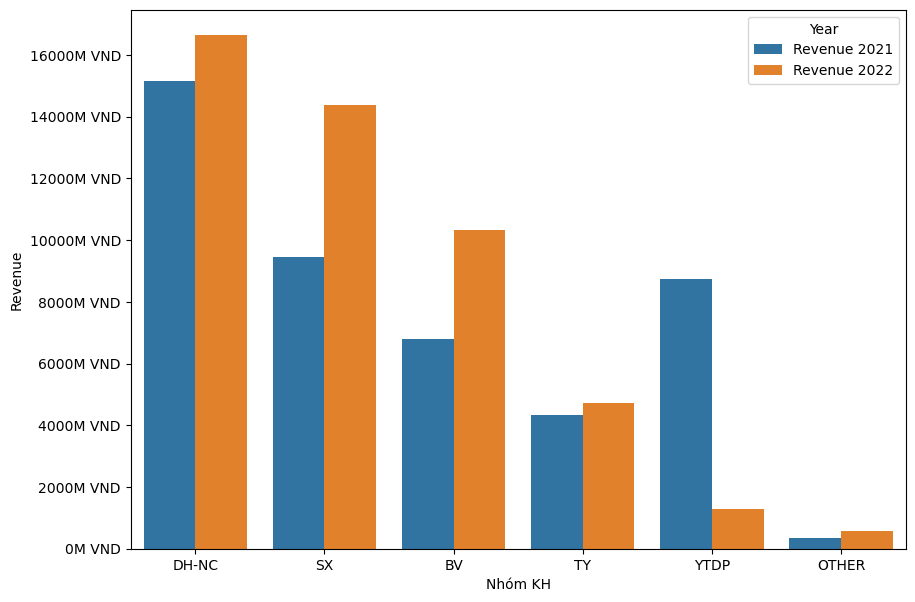

In [187]:
barplot(BID_BPD_cell_culture, 'Revenue', 'Nhóm KH')

(<Figure size 1000x700 with 1 Axes>,
 <AxesSubplot:xlabel='Revenue', ylabel='PLG Label'>)

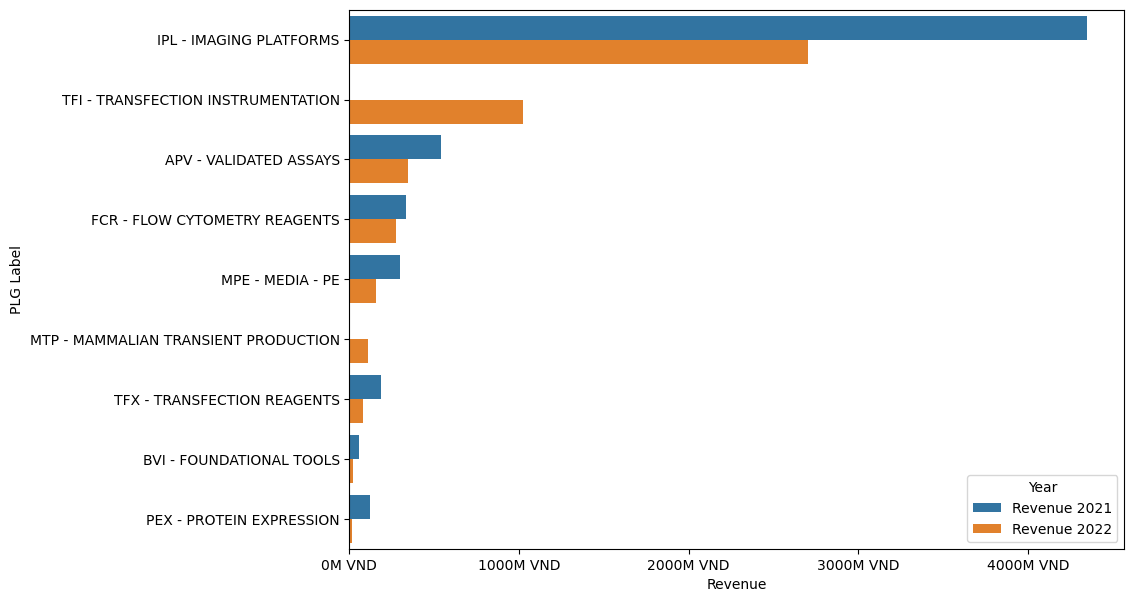

In [188]:
hbarplot(BID_cell_analysis_noSX, 'Revenue', 'PLG Label')

In [202]:
def pie(v, l, color=None):
    plt.pie(v, labels=l.values)
def piechart(df, parameter, category):
    df = df.reset_index()
    if parameter == 'Revenue':
        df = df.drop(columns = df.filter(like='Qty').columns)
        df = df.drop(columns = df.filter(like='Growth').columns)
        df = pd.melt(df, id_vars=[category], value_vars=df.filter(like='Revenue').columns, var_name='Year', value_name='Revenue')
        fig, ax = plt.subplots(figsize = (10,7))
        g = sns.FacetGrid(df, col="Year")
        g.map(pie, category, 'Revenue' )
    elif parameter == 'Qty':
        df = df.drop(columns = df.filter(like='Revenue').columns)
        df = df.drop(columns = df.filter(like='Growth').columns)
        df = pd.melt(df, id_vars=[category], value_vars=df.filter(like='Qty').columns, var_name='Year', value_name='Qty')
        fig, ax = plt.subplots(figsize = (10,7))
        g = sns.FacetGrid(df, col="Year")
        g.map(lambda x, l: plt.pie(v, labels=l.values), category, 'Revenue')
    return fig, ax

ValueError: could not convert string to float: 'DH-NC'

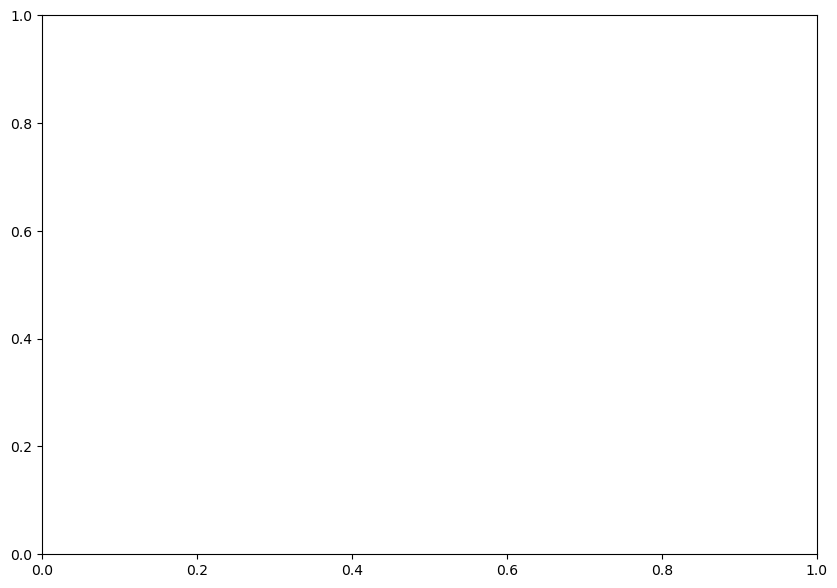

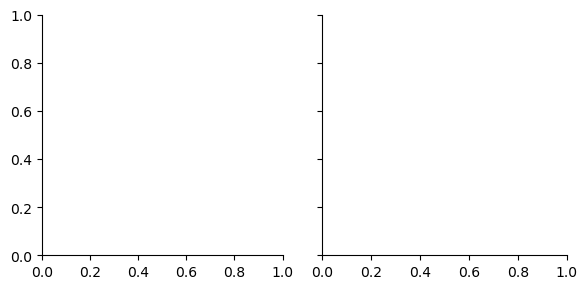

In [203]:
piechart(BID_BPD_cell_culture, 'Revenue', 'Nhóm KH')